## Descubra quem fez o ENEM 2016 apenas para treino

 O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.
 Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.
 Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e IN_TREINEIRO.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

plt.style.use('seaborn-colorblind')

##### Leitura e informações detalhadas do dataframe

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [13]:
df_test.shape

(4570, 43)

In [12]:
df_train.shape

(13730, 167)

In [5]:
df_test.index

RangeIndex(start=0, stop=4570, step=1)

In [6]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [7]:
df_train = df_train[['NU_INSCRICAO','IN_TREINEIRO','CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

In [8]:
df_train.head()

,NU_INSCRICAO,IN_TREINEIRO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,0,43,RS,24,M,1,1,1,4,...,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,0,23,CE,17,F,3,1,2,0,...,80.0,580.0,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,0,23,CE,21,F,3,1,3,0,...,NaN,NaN,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,0,33,RJ,25,F,0,1,1,9,...,NaN,NaN,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,0,13,AM,28,M,2,1,1,4,...,NaN,NaN,E,D,C,A,A,B,F,A


In [9]:
df_train.isna().sum().sort_values(ascending=False).head(14)

TP_DEPENDENCIA_ADM_ESC    9448
TP_ENSINO                 9448
Q027                      7373
NU_NOTA_COMP1             3597
NU_NOTA_COMP5             3597
TP_STATUS_REDACAO         3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_REDACAO           3597
NU_NOTA_LC                3597
NU_NOTA_CH                3389
NU_NOTA_CN                3389
TP_ANO_CONCLUIU              0
dtype: int64

##### Dados sobre o treineiro

In [10]:
df_train.IN_TREINEIRO.value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [11]:
(df_train.corr(method='spearman')['IN_TREINEIRO'] < -0.5).sort_values(ascending=False).head(5)

NU_IDADE             True
NU_NOTA_REDACAO     False
IN_SABATISTA        False
CO_UF_RESIDENCIA    False
TP_COR_RACA         False
Name: IN_TREINEIRO, dtype: bool

In [12]:
(df_train.corr(method='spearman')['IN_TREINEIRO'] > 0.5).sort_values(ascending=False).head(5)

IN_TREINEIRO         True
TP_ST_CONCLUSAO      True
IN_SABATISTA        False
CO_UF_RESIDENCIA    False
NU_IDADE            False
Name: IN_TREINEIRO, dtype: bool

In [13]:
df_train.TP_ST_CONCLUSAO.value_counts()

1    6524
2    4283
3    2306
4     617
Name: TP_ST_CONCLUSAO, dtype: int64

In [14]:
df_train.groupby('TP_ST_CONCLUSAO')['IN_TREINEIRO'].sum()

TP_ST_CONCLUSAO
1       0
2       0
3    1783
4       0
Name: IN_TREINEIRO, dtype: int64

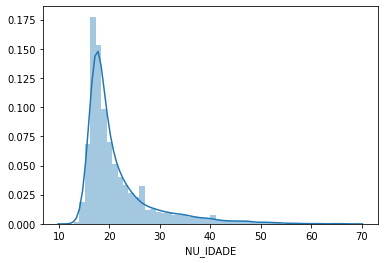

In [19]:
sns.distplot(df_train.NU_IDADE)

(0.0, 40.0)

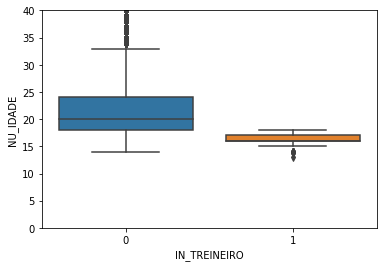

In [15]:
sns.boxplot(df_train.IN_TREINEIRO, df_train.NU_IDADE)
plt.ylim(0,40)

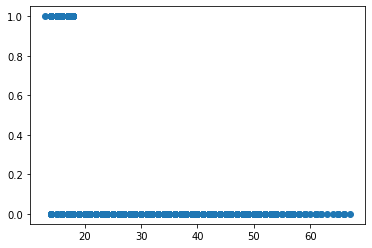

In [16]:
plt.scatter(df_train.NU_IDADE, df_train.IN_TREINEIRO);

#### Variaveis

In [17]:
df_train['idade_scaled'] = (df_train['NU_IDADE'] - df_train['NU_IDADE'].mean())/ df_train['NU_IDADE'].std()
df_test['idade_scaled'] = (df_test['NU_IDADE'] - df_test['NU_IDADE'].mean())/ df_test['NU_IDADE'].std()

In [21]:
bl_x = df_train[['idade_scaled','TP_ST_CONCLUSAO']]
bl_y = df_train.IN_TREINEIRO

X_train, X_val, y_train, y_val = train_test_split(bl_x, bl_y, test_size=0.25, random_state=42)
X_test = df_test[['idade_scaled','TP_ST_CONCLUSAO']]

#### Random Forest Classifier

Accuracy: 0.997087095834547
Precision: 1.0
Recall: 0.9774266365688488


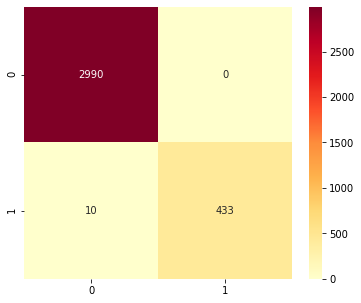

In [24]:
#testando o modelo
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_pred),annot=True, cmap="YlOrRd" ,fmt='g')

print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

In [27]:
#fazendo a previsão
y_pred = rf.predict(X_test)

answer = pd.DataFrame({'NU_INSCRICAO':df_test.NU_INSCRICAO,
                        'IN_TREINEIRO':y_pred})
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [28]:
answer.to_csv('answer.csv',index=False)

In [ ]:
answer